<a href="https://colab.research.google.com/github/GhaziBenHenia/Neural_Network_from_scratch./blob/main/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Building Neural Networks from scratch**

# 1) Introduction

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/dataflower

/content/drive/MyDrive/dataflower


In [ ]:
NNTraining_data = pd.read_csv('/content/drive/MyDrive/NN_data/NNTraining_data.csv')
NNTest_data = pd.read_csv('/content/drive/MyDrive/NN_data/NNTest_data.csv')

In [ ]:
NNTraining_data.head()

,0,1,2,3
0,3.682795,4.540686,0.119606,0.880394
1,-4.935752,-3.951901,0.852986,0.147014
2,4.938425,-1.880418,0.880796,0.119204
3,3.824091,-3.374826,0.880797,0.119203
4,4.849526,4.542527,0.123314,0.876686


In [ ]:
NNTest_data.head()

,0,1,2,3
0,1.287235,3.094796,0.119462,0.880538
1,-1.900905,-2.726798,0.878145,0.121855
2,1.850491,-3.554629,0.880797,0.119203
3,1.475565,-3.215275,0.880796,0.119204
4,0.317844,2.789317,0.119299,0.880701


# 2) Programming the network

2.1 Forward pass function

In [ ]:
# Sample 1
x1 = np.array([[2], [1]])
t1 = np.array([[1], [0]])
# Sample 2
x2 = np.array([[-1], [3]])
t2 = np.array([[0], [1]])
# Weights
W = np.array([[2], [-3], [-3], [4], [1], [-1], [0.25], [2]])


In [ ]:
# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
def forward_pass(x, t, w):

    h1 = w[0][0]*x[0][0]+w[2][0]*x[1][0]
    h2 = w[1][0]*x[0][0]+w[3][0]*x[1][0]


    h = np.array([[h1], [h2]])
    h = sigmoid(h)


    y1 = w[4][0]*h[0][0]+w[6][0]*h[1][0]
    y2 = w[5][0]*h[0][0]+w[7][0]*h[1][0]


    y = np.array([[y1], [y2]])
    y = sigmoid(y)


    # Squared error loss
    loss = np.sum((y - t) ** 2)
    return loss

In [ ]:
# Perform forward pass
loss1 = forward_pass(x1, t1, W)
loss2 = forward_pass(x2, t2, W)
# Print results
print("Loss for Sample 1: L =", round(loss1,3))
print("Loss for Sample 2: L =", round(loss2,3))

Loss for Sample 1: L = 0.245
Loss for Sample 2: L = 0.33


2.2 Implementing the backpropagation of the network

In [ ]:
def sigmoid_derivative(x):
    return x * (1 - x)

In [ ]:
def forward_backward_pass(x, t, w):
    # Forward pass
    h1 = w[0][0]*x[0][0] + w[2][0]*x[1][0]
    h2 = w[1][0]*x[0][0] + w[3][0]*x[1][0]

    h = np.array([[h1], [h2]])
    h = sigmoid(h)

    y1 = w[4][0]*h[0][0] + w[6][0]*h[1][0]
    y2 = w[5][0]*h[0][0] + w[7][0]*h[1][0]

    y = np.array([[y1], [y2]])
    y = sigmoid(y)

    # Squared error loss
    loss = np.sum((y - t) ** 2)

    # Backward pass
    delta_y = 2 * (y - t) * sigmoid_derivative(y)

    grad_w = np.zeros_like(w)

    grad_w[4][0] = delta_y[0][0] * h[0][0]
    grad_w[5][0] = delta_y[1][0] * h[0][0]
    grad_w[6][0] = delta_y[0][0] * h[1][0]
    grad_w[7][0] = delta_y[1][0] * h[1][0]

    delta_h = np.zeros_like(h)
    delta_h[0][0] = delta_y[0][0] * w[4][0] + delta_y[1][0] * w[5][0]
    delta_h[1][0] = delta_y[0][0] * w[6][0] + delta_y[1][0] * w[7][0]
    delta_h *= sigmoid_derivative(h)

    grad_w[0][0] = delta_h[0][0] * x[0][0]
    grad_w[1][0] = delta_h[1][0] * x[0][0]
    grad_w[2][0] = delta_h[0][0] * x[1][0]
    grad_w[3][0] = delta_h[1][0] * x[1][0]

    return loss, grad_w


In [ ]:
W = np.array([[2], [-3], [-3], [4], [1], [-1], [0.25], [2]])

# Perform forward and backward pass
final_loss1, updated_weights1 = forward_backward_pass(x1, t1, W)
final_loss2, updated_weights2 = forward_backward_pass(x2, t2, W)
# Results
print("Final Loss:", round(final_loss1,3))
print("Updated Weights:\n",  [[round(val, 2) for val in row] for row in updated_weights1.T][0])


print("Final Loss:", round(final_loss2,3))
print("Updated Weights:\n", [[round(val, 3) for val in row] for row in updated_weights2.T][0])

Final Loss: 0.245
Updated Weights:
 [-0.12, 0.07, -0.06, 0.03, -0.1, 0.13, -0.02, 0.02]
Final Loss: 0.33
Updated Weights:
 [-0.0, -0.0, 0.0, 0.0, 0.0, -0.0, 0.277, -0.025]


# 3) Training and testing the network

3.1 Training and testing on three samples

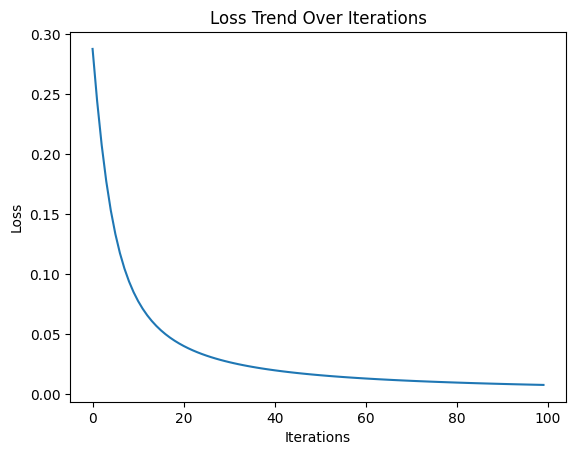

In [ ]:
# Initializing weights
W = np.array([[2], [-3], [-3], [4], [1], [-1], [0.25], [2]])


# Hyperparameters
learning_rate = 1.5
num_iterations = 100

losses = []

for iteration in range(num_iterations):
    total_loss = 0
    total_grad_w = np.zeros_like(W)

    # Iterate over individual samples
    for x_sample, t_sample in zip([x1, x2], [t1, t2]):
        # Forward and backward pass for the sample
        loss, grad_w = forward_backward_pass(x_sample, t_sample, W)

        total_loss += loss
        total_grad_w += grad_w

    # Updating the weights using the accumulated gradients
    W -= learning_rate * (total_grad_w / 2)

    # Calculating average loss for the iteration
    avg_loss = total_loss / 2
    losses.append(avg_loss)

# Plotting the loss trend
plt.plot(losses)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Trend Over Iterations')
plt.show()


In [ ]:
# New Sample 3
x3 = np.array([[1], [4]])
t3 = np.array([[1], [0]])

loss3, grad_w3 = forward_backward_pass(x3, t3, W)

print("Loss for Sample 3: L =", loss3)

Loss for Sample 3: L = 1.7596489314534582


3.2 Training and testing on a large dataset

In [ ]:
X1 = NNTraining_data.iloc[: ,0]
X2 = NNTraining_data.iloc[: ,1]
T1 = NNTraining_data.iloc[: ,2]
T2 = NNTraining_data.iloc[: ,3]

In [ ]:
def Modified_forward_backward_pass(x_batch, t_batch, W):
    total_loss = 0
    total_grad_w = np.zeros_like(W)

    for i in range(x_batch.shape[1]):
        x = np.array([[x_batch[0, i]], [x_batch[1, i]]])
        t = np.array([[t_batch[0, i]], [t_batch[1, i]]])

        # Forward pass
        h1 = W[0][0]*x[0][0] + W[2][0]*x[1][0]
        h2 = W[1][0]*x[0][0] + W[3][0]*x[1][0]
        h = np.array([[h1], [h2]])
        h = sigmoid(h)

        y1 = W[4][0]*h[0][0] + W[6][0]*h[1][0]
        y2 = W[5][0]*h[0][0] + W[7][0]*h[1][0]
        y = np.array([[y1], [y2]])
        y = sigmoid(y)

        # Squared error loss
        loss = np.sum((y - t) ** 2)
        total_loss += loss

        # Backward pass
        delta_y = 2 * (y - t) * sigmoid_derivative(y)

        grad_w = np.zeros_like(W)

        grad_w[4][0] = delta_y[0][0] * h[0][0]
        grad_w[5][0] = delta_y[1][0] * h[0][0]
        grad_w[6][0] = delta_y[0][0] * h[1][0]
        grad_w[7][0] = delta_y[1][0] * h[1][0]

        delta_h = np.zeros_like(h)
        delta_h[0][0] = delta_y[0][0] * W[4][0] + delta_y[1][0] * W[5][0]
        delta_h[1][0] = delta_y[0][0] * W[6][0] + delta_y[1][0] * W[7][0]
        delta_h *= sigmoid_derivative(h)

        grad_w[0][0] = delta_h[0][0] * x[0][0]
        grad_w[1][0] = delta_h[1][0] * x[0][0]
        grad_w[2][0] = delta_h[0][0] * x[1][0]
        grad_w[3][0] = delta_h[1][0] * x[1][0]

        # Accumulate gradients for the batch
        total_grad_w += grad_w

    # Calculate average loss for the batch
    avg_loss = total_loss / x_batch.shape[1]
    return avg_loss, total_grad_w


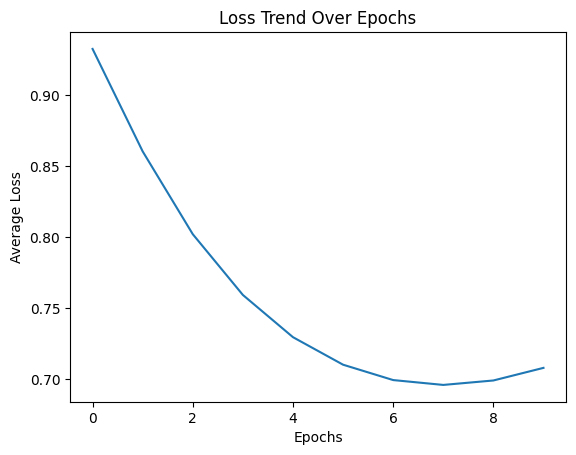

In [ ]:
# Initializing weights
W = np.array([[2], [-3], [-3], [4], [1], [-1], [0.25], [2]])

# Hyperparameters
learning_rate = 0.01
batch_size = 90
num_epochs = 10

# Storing losses for plotting at the end
epoch_losses = []

# Converting x1, x2, t1, t2 to numpy arrays
X1, X2, T1, T2 = np.array(X1), np.array(X2), np.array(T1), np.array(T2)

# Iterate over epochs
for epoch in range(num_epochs):
    epoch_loss = 0

    # Iterating over batches
    for i in range(0, len(X1), batch_size):
        # Extract batches
        x1_batch, x2_batch = X1[i:i+batch_size], X2[i:i+batch_size]
        t1_batch, t2_batch = T1[i:i+batch_size], T2[i:i+batch_size]

        # Reshaping batches to make them 2D
        x1_batch, x2_batch = x1_batch.reshape(-1, 1), x2_batch.reshape(-1, 1)
        t1_batch, t2_batch = t1_batch.reshape(-1, 1), t2_batch.reshape(-1, 1)

        x_batch = np.concatenate((x1_batch, x2_batch), axis=1)
        t_batch = np.concatenate((t1_batch, t2_batch), axis=1)

        # Forward and backward pass for the batch
        batch_loss, batch_grad_w = Modified_forward_backward_pass(x_batch, t_batch, W)

        # Accumulating loss for the epoch
        epoch_loss += batch_loss

        # Accumulating gradients for the epoch
        total_grad_w += batch_grad_w

    # Updating the weights using the accumulated gradients
    W -= learning_rate * total_grad_w / len(range(0, len(x1), batch_size))

    # Calculating average loss for the epoch
    avg_epoch_loss = epoch_loss / len(range(0, len(x1), batch_size))
    epoch_losses.append(avg_epoch_loss)

# Plotting the loss trend
plt.plot(epoch_losses)
plt.xlabel('Epochs')
plt.ylabel('Average Loss')
plt.title('Loss Trend Over Epochs')
plt.show()


In [ ]:
X1_test = NNTest_data.iloc[: ,0]
X2_test = NNTest_data.iloc[: ,1]
T1_test = NNTest_data.iloc[: ,2]
T2_test = NNTest_data.iloc[: ,3]

In [ ]:
# List to store losses
all_losses = []
# Loop through the test data
for i in range(len(X1_test)):
    x = np.array([[X1_test[i]], [X2_test[i]]])
    t = np.array([[T1_test[i]], [T2_test[i]]])

    # Call forward_pass function
    losses = forward_pass(x, t, W)
    # Append losses to the list
    all_losses.append(losses)

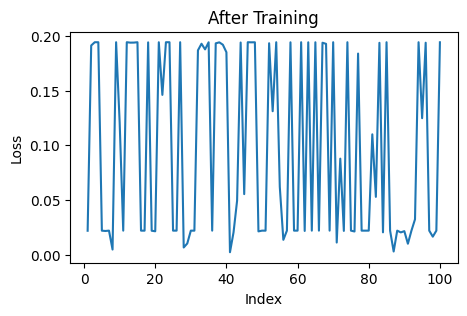

In [ ]:
# Plot the losses
plt.figure(figsize=(5, 3))
plt.plot(range(1, len(all_losses) + 1), all_losses, '-')

plt.xlabel('Index')
plt.ylabel('Loss')
plt.title('After Training')
plt.show()

In [ ]:
# Initializing weights
W = np.array([[2], [-3], [-3], [4], [1], [-1], [0.25], [2]])
# List to store losses
all_losses = []
# Loop through the test data
for i in range(len(X1_test)):
    x = np.array([[X1_test[i]], [X2_test[i]]])
    t = np.array([[T1_test[i]], [T2_test[i]]])

    # Call forward_pass function
    losses = forward_pass(x, t, W)
    # Append losses to the list
    all_losses.append(losses)

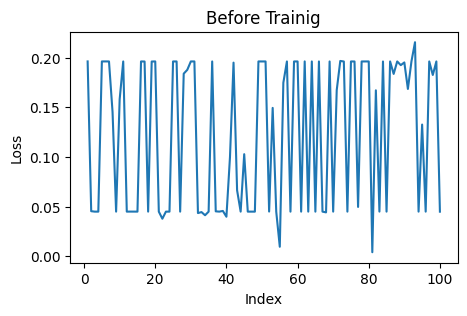

In [ ]:
# Plot the losses
plt.figure(figsize=(5, 3))
plt.plot(range(1, len(all_losses) + 1), all_losses, '-')

plt.xlabel('Index')
plt.ylabel('Loss')
plt.title('Before Trainig')
plt.show()